In [2]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Import data
df = pd.read_csv("PEA15.csv")
#df = sns.load_dataset("PEA15.csv").rename(columns={"Component": "Indicator"})
df

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,2013,Annual births,Thousand,69.4
1,Annual Population Change,2013,Annual deaths,Thousand,29.8
2,Annual Population Change,2013,Natural increase,Thousand,39.6
3,Annual Population Change,2013,Immigrants,Thousand,62.7
4,Annual Population Change,2013,Emigrants,Thousand,81.3
...,...,...,...,...,...
83,Annual Population Change,2023,Immigrants,Thousand,141.6
84,Annual Population Change,2023,Emigrants,Thousand,64.0
85,Annual Population Change,2023,Net migration,Thousand,77.6
86,Annual Population Change,2023,Population change,Thousand,97.6


In [4]:
#Cleaning my dataset - I won"t need these 2 columns
to_drop = ["STATISTIC Label",
            "UNIT"]
df.drop(to_drop, inplace=True, axis=1)

In [5]:
#Making sure that my data set is ready to - EDA

In [ ]:
## df.head( )
## df.info( )
## .describe( )

In [6]:
df.head()

,Year,Component,VALUE
0,2013,Annual births,69.4
1,2013,Annual deaths,29.8
2,2013,Natural increase,39.6
3,2013,Immigrants,62.7
4,2013,Emigrants,81.3


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.count()

In [ ]:
#Verifing if I have any data duplicated (inconsitent)
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

In [12]:
#Converting the numbers to be better in the visualisation
df ["real_number"] = df ["VALUE"]* 1000

In [18]:
# Getting unique years in the DataFrame
years = df["Year"].unique()

# Creating a separate bar plot for each year
for year in years:
    year_data = df[df["Year"] == year]
    
# Filter out the 'population' row 
year_data = year_data[year_data['Component'] != 'Population']

# Group the data by "Component" and calculate the sum of "VALUE"
grouped = year_data.groupby("Component")["real_number"].sum()

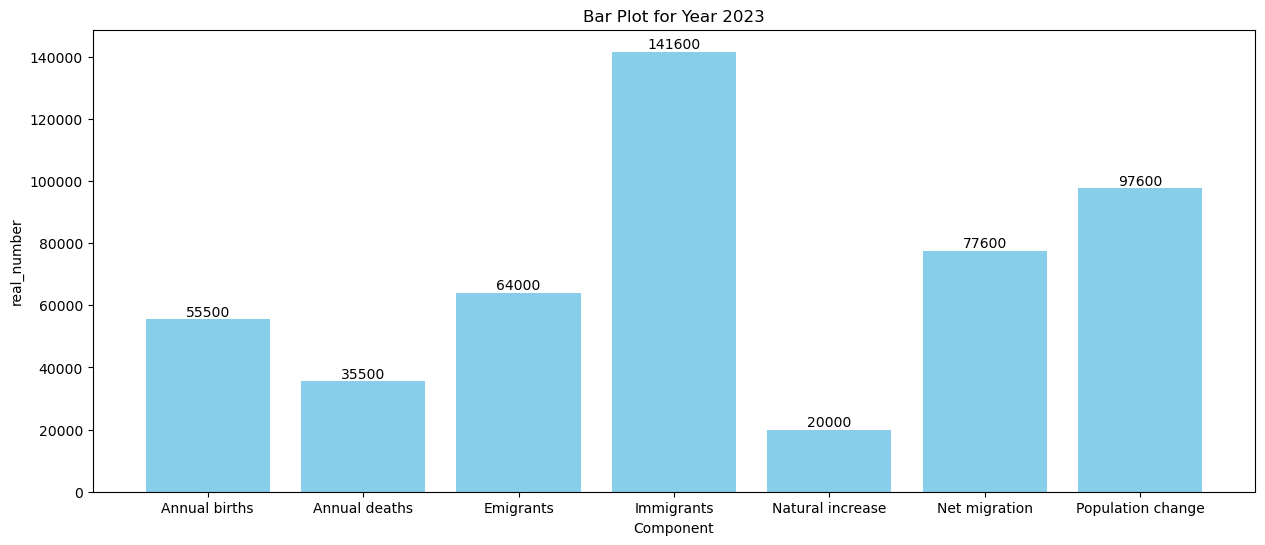

In [19]:
# Creating a bar plot for the current year
plt.figure(figsize=(15, 6))
plt.bar(grouped.index, grouped.values, color="skyblue")
plt.title(f"Bar Plot for Year {year}")
plt.xlabel("Component")
plt.ylabel("real_number")

# Adding values on top of the bars
for x, y in zip(grouped.index, grouped.values):
        plt.text(x, y, f"{y:.0f}", ha="center", va="bottom")
    
# Show each plot
plt.show()